#Introduction

The objective of this project is to explore solutions to solve business intelligence and data mining problems. The specific problems in this case being:

•	Data exploration, pre-processing, and visualization.

•	Customer behaviour analysis and Customer Segmentation. 

•	Build a shopping recommender system. 

•	Evaluate the recommender system that you have implemented. 


Through the process of this project we hope to "meet" the learning outcomes 
which are as follows: 

•	 Demonstrate an understanding of the concepts of machine learning, data mining and business intelligence and its relevant theory and techniques.

•	Present the leading data mining methods and their applications to real-world problems.

•	Develop both the theoretical and practical skills needed to reveal patterns and valuable information hidden in large data sets.

•	Evaluate critically the outputs from data mining research and speak meaningfully to the usefulness of such data outputs in business context.

We hope to complete the 4 main sections of the assignment; showing multiple ways of data exploration and data visualization; A number of recommender systems, using different methods and various ways of evaluating them.

#Materials and Methods

##Dataset
The dataset used is the "Retailrocket recommender system dataset", this "consists of three files: a file with behaviour data (events.csv), a file with item properties (itemproperties.сsv) and a file, which describes category tree (categorytree.сsv). The data has been collected from a real-world ecommerce website. It is raw data, i.e. without any content transformations, however, all values are hashed due to confidential issues" (RetailRocket, 2017).


##Methods


**Data Exploration**
*   Viewing Data Through Excel.
*   Checking data for Missing Values.
*   Viewing Data format and composition using .describe and .head.

**Pre-Processing**
*   Check for missing values and noise.
*   Change Timestamp Data to time and date.
*   Check for categorical data.
*   Check if feature scaling is needed.
*   Plot Graphs or Charts to visualize data
*   Check if other pre-processing steps are needed

**Customer Segmentation**
*   Find underlying factors that differentiate or show similarities between the customers.
*   Validate whether the hypothesis is correct with a more critical and specific approach.
*   Make conclusions, define the customer group, using: the evidence gathered from data and analytical thinking.


**Building the recommender**
*   Using the category data to develop recommendations based on simliar popular products within a given category
*   Using the customer segmentation to develop recommendations based on what similiar customers have bought
*   Using Aprori algorithm to find rules and relationships between items purchased which inform recommendations
*   Using lightfm to develop a model of ratings based on user-item interactions.

**Evaluating the Recommender**
*  Area Under The Curve
*  Precision at k 

#Data Exploration-subtask1

##The goal
Data exploration helps create a more straightforward view of datasets rather than pouring over thousands of figures in unstructured data, this will help streamline later requirements.


Before exploring the data using Python code, we opened the .csv's using excel and read the attached read me file contained with the data. 


**Events**
The readme and the excel file revealed that the events csv contains a unix time stamp, this will need to be processed, additionally the file contains information on when visitors added items to their cart, viewed or purchased items. There is a transaction field which is empty where a view or addtocart event took place.

**category_tree**
The file appears to contain a categoryId and parentid, according to the documentation, the category tree file has 1669 rows. Every row in the file specifies a child categoryId and the corresponding parent.

**item_properties**
According to the documentation the item_properties_part1 and item_properties_part2 are linked, these will need to be merged. According to the documentation the file is grouped into snapshots to reduce the number of rows. Additionally, some of the values have been hashed for privacy reasons, this may be irreversible. 



Now lets explore the data using Python code and see what we will discover.

##The code

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, handling CSV files, input and output. usage: pd.read_csv()
import matplotlib.pyplot as plt #for data visualisation
import datetime #libaries used to display timestamps
import matplotlib.dates as mdates

import random
import seaborn as sns #library for data visualisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os
from mpl_toolkits.mplot3d import Axes3D #for plotting
from sklearn.preprocessing import StandardScaler
import collections # for removing duplicate values from array

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#lightfm
!pip install lightfm
from lightfm import LightFM
from lightfm.evaluation import auc_score, precision_at_k
from scipy.sparse import coo_matrix
from sklearn import preprocessing


In [ ]:
#loading data
data_events = pd.read_csv('events.csv')
data_categorytree = pd.read_csv('category_tree.csv')
data_itempropertiespart1 = pd.read_csv('item_properties_part1.csv')
data_itempropertiespart2 = pd.read_csv('item_properties_part2.csv')

### Categorical Data

In [ ]:
data_events.info() 
data_categorytree.info()
data_itempropertiespart1.info()
data_itempropertiespart2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB
<cl

In events, the column named event only contains categorical data.
In the item properties csvs, in the column property, some of the data is categorical.

### Data Cleaning

Checking if there are missing values in each file

In [ ]:
data_categorytree.isnull().sum()

categoryid     0
parentid      25
dtype: int64

The column "parentid" in file "category_tree.csv" has 25 missing values. The three options of what do  when there are missing values:



*   Get rid of corresponding districts
*   Get rid of the whole attribute
*   Set the values to some value

(Gereon, 2019)

However, the column represent an id so we cannot remove the attribute or fill it ourselves.

In [ ]:
data_events.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

For the "transactionid" column in the "events.csv" file, we have a lot of missing values. The missing values however correspond to where a transaction did not take place. Meaning that no cleaning needs to occur here.

In [ ]:
data_itempropertiespart1.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [ ]:
data_itempropertiespart2.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [ ]:
data_categorytree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


We can see the categoryid and parentid's here, perhaps we can combine these with itemid's later.

In [ ]:
data_events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


The timestamp is in unix, this needs to be converted.

In [ ]:
data_itempropertiespart1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [ ]:
data_itempropertiespart2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


The value attribute is hashed as described in the documentation, this is could have context about the transaction but is likely difficult to reverse.

Some times the property has the value of "categoryid" then the value attribute has a number, this could be used to link itemid to categoryid/parentid

Since the two item property files have the same structure it is safe to merge them. 

##The outcomes
We found a few empty parentid's but, as discussed, we can't fill these in, the documentation says that this means that these categories don't have parentID's. Additionally, we found alot of empty transaction ID's but, as discussed previously, this is explained as transactionID's aren't required for non-transaction events.

The event csv contains 3 different types of "events", this means we need to seperate out these 3 events into 3 differnet dataframes.

The events and item property csv's all contain unix timestamps, this needs to be converted.

We found a categoryid property in the item property file, this can be used to combine the itemid with it's respective categoryid.





#Data pre-processing-subtask1

##The goal



Steps:

1. Merge the two item property dataframes. 
2. We need to convert all unix timestamps into date and time, this could be useful for further analysis or seeing purchasing patterns.
3. Seperate all events into 3 different dataframes addtocart, view and transaction.
4. We need to combine the itemid with the category and parentid.
5. Check is feature scaling is required.


##The code

**Merging item properties dataframes**

In [ ]:
properties=pd.concat([data_itempropertiespart1,data_itempropertiespart2])

Here is a function for converting timestamp for both the properties and events dataframe, as previously discussed the timestamp is expressed in Unix Epoch format. We will use this function later

In [ ]:
#Converting Timestamp in the events dataframe
liste=[]
#using enumerate to count the ammount timestamp appears in the dataframe
for i, unix in enumerate(data_events['timestamp']):
  #converting timestamp into datetime format
    timestamp, ms = divmod(unix, 1000)

    #creating datafarme to hold the date and the time converted from timestamps
    dt = datetime.datetime.fromtimestamp(timestamp) + datetime.timedelta(milliseconds=ms)
    #making a list that will hold the date and time in the described format
    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

    liste.append(formatted_time)
#making another column in the dataframe to hold the dates and times from the list
data_events['date_time']=pd.DataFrame({'date_time':liste})
data_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


**Seperating all events into 3 different dataframes addtocart, view and transaction**

In [ ]:
#finding all events where a transaction took place
transaction = data_events[data_events['event'] == 'transaction']
transaction = transaction.drop(['event'], axis = 1)
transaction.head()

,timestamp,visitorid,itemid,transactionid,date_time
130,1433222276276,599528,356475,4000.0,2015-06-02 05:17:56.276
304,1433193500981,121688,15335,11117.0,2015-06-01 21:18:20.981
418,1433193915008,552148,81345,5444.0,2015-06-01 21:25:15.008
814,1433176736375,102019,150318,13556.0,2015-06-01 16:38:56.375
843,1433174518180,189384,310791,7244.0,2015-06-01 16:01:58.180


In [ ]:
#finding all events where item added to cart
addtocart = data_events[data_events['event'] == 'addtocart']
addtocart = addtocart.drop(['transactionid','event'], axis = 1)
addtocart.head()

,timestamp,visitorid,itemid,date_time
17,1433223236124,287857,5206,2015-06-02 05:33:56.124
19,1433221078505,158090,10572,2015-06-02 04:57:58.505
63,1433223543021,1193904,255275,2015-06-02 05:39:03.021
112,1433221941632,599528,356475,2015-06-02 05:12:21.632
179,1433220880956,105775,312728,2015-06-02 04:54:40.956


In [ ]:
#finding all items were viewed
view = data_events[data_events['event'] == 'view']
view = view.drop(['transactionid','event'], axis = 1)

view.head()

,timestamp,visitorid,itemid,date_time
0,1433221332117,257597,355908,2015-06-02 05:02:12.117
1,1433224214164,992329,248676,2015-06-02 05:50:14.164
2,1433221999827,111016,318965,2015-06-02 05:13:19.827
3,1433221955914,483717,253185,2015-06-02 05:12:35.914
4,1433221337106,951259,367447,2015-06-02 05:02:17.106


**Grouping the itemid is its respective category and parentid's**

In [ ]:
#remove the hashed items
properties = properties.loc[properties.property.isin(['categoryid', 'available']), :]
#drop duplicates and create 2 tables 1 avaiable and 1 categoryid
categoryid = properties[properties.property=='categoryid'].drop_duplicates('itemid', keep='first')
item_category = categoryid[['itemid', 'value']]
item_category.columns = ['itemid', 'categoryid']
available = properties[properties.property=='available']
#later we can use the categories to recommend similiar items

The available attribute defines whether or not an item was in stock at that timestamp, not sure if this will be useful to use or not right now.

In [ ]:
available.head()

,timestamp,itemid,property,value
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1
96,1437274800000,430459,available,0


We can merge the category_tree csv with the categoryid dataframe we just created to get a dataframe where we can see the relationship between itemid, categoryid and parentid this will prove to be useful later on in the recommendor most likely

In [ ]:
categorydata = data_categorytree.dropna()
category_parent_dict = categorydata.set_index('categoryid').T.to_dict('list')

pd.options.mode.chained_assignment = None
item_category['parentid'] = item_category.categoryid.apply(lambda x: int(category_parent_dict.get(int(x), [x])[0]))

item_category.head()

,itemid,categoryid,parentid
0,460429,1338,1278
140,281245,1277,312
151,35575,1059,1696
189,8313,1147,1027
197,55102,47,381


##The outcome



Now we have 3 event dataframes containing, view, addtocart, and transactions, I removed the event column for all three dataframes and the transactionid for the addtocart and view dataframes, this is because they are redundant. 

The itemid is now link to its category and parentid where available through the item_category dataframe.

The item properties have been merged to one dataframe.

All timestamps have been converted.

#Data visualization-subtask1

##The goal



With the rapid growth in the techniques for knowledge discovery in databases (KDD), data visualization becomes increasingly important in spotting patterns during data mining (Grinstein at al., 2002). This subtask is aiming at discovering correlations between different variables from graphs, as well as understanding the data distributions. The visualization will be performed on the data frame after preprocessing.

##The code

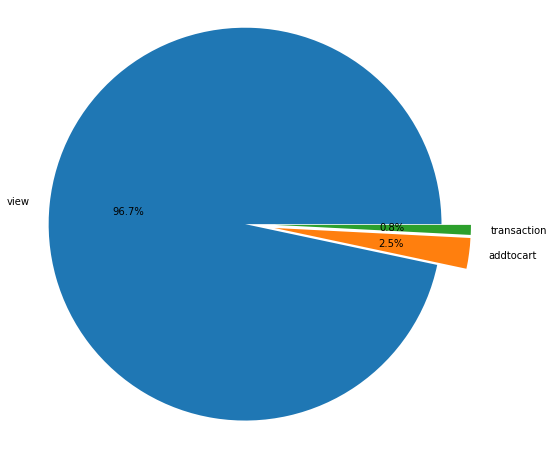

In [ ]:
data = data_events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.15, 0.15)  # explode 1st slice
plt.subplots(figsize=(8,8))
# Plot
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
 
plt.axis('equal')
plt.show()

The Pie chart of the events table better demonstrates the share of events, the view action accounts for 96.9% of actions while the transaction only accounts for 0.8%. 

It could be interesting to see the relationship between the three event types.

In [ ]:
events = data_events.drop(['visitorid'], axis = 1)

#find the total number of tranactions per item
transaction = events[events['event'] == 'transaction']
transaction = transaction['itemid'].value_counts()
transaction = pd.DataFrame(transaction).reset_index()
transaction.columns = ['itemid', 'transaction']

#find the total number of addtocart per item
addtocart = events[events['event'] == 'addtocart']
addtocart = addtocart['itemid'].value_counts()
addtocart = pd.DataFrame(addtocart).reset_index()
addtocart.columns = ['itemid', 'addtocart']

#find the total number of view per item
view = events[events['event'] == 'view']
view = view['itemid'].value_counts()
view = pd.DataFrame(view).reset_index()
view.columns = ['itemid', 'view']

eventsum = transaction.merge(addtocart, left_on='itemid', right_on='itemid')
eventsum = eventsum.merge(view, left_on='itemid', right_on='itemid')
eventsum.head()

,itemid,transaction,addtocart,view
0,461686,133,306,2539
1,119736,97,44,752
2,213834,92,17,293
3,312728,46,162,947
4,7943,46,97,1346


We can see just from inspecting the dataframe created that the relationship between each event may be quite weak, to better show this we will create a correlation martix.

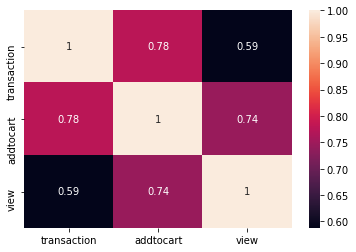

In [ ]:
df = pd.DataFrame(eventsum,columns=['transaction','addtocart','view'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

It would be interesting to see the number of visitors that the store gets and the number of people who purchase something

In [ ]:
#Find all visitors
all_visitors = data_events.visitorid.sort_values().unique() #Making array of all unique visitors id in an array sorting it by the values accendigly
no_all_visitors = all_visitors.size

#Find All buying visitors
buying_visitors = data_events[data_events.event == 'transaction'].visitorid.sort_values().unique()
no_buying_visitors = buying_visitors.size

#Find All Non Buying visitors
no_browsing_visitors = no_all_visitors - no_buying_visitors


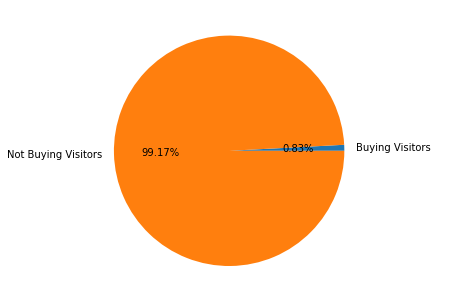

In [ ]:
#Pie chart to show buying to non buying visitors
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Buying Visitors', 'Not Buying Visitors']
students = [no_browsing_visitors,no_browsing_vistors]
ax.pie(students, labels = labels,autopct='%1.2f%%')
plt.show()

This is a surprising outcome, it hints that alot of people are just browsing the website.

##The outcome (interpretation)




From the first pie chart we can see that the majority of events are item views, this is unsurprising however in the final pie chart we can see that the vast majority of visitors don't purchase anything. Just over 99% of people don't have a transaction. This could mean that the webpage sees alot of traffic from outside of its core customer base perhaps

The correlation matrix demonstrates viewing and purchasing have a weak relationship meaning users are likely just browsing, where as the relationship between addtocart and transactions is quite strong. This would indicate once an item is added to cart the user is likely to purchase it unsurprisingly.

#Customer behaviour analysis-subtask2



##Interaction patterns

### The goal


The goal here is to get a better idea of what the customers are, what they do and how they interact with the store

### The code


First we make a list of all customers id.That's both the customers that bought something and those who just viewed the items.

In [ ]:
all_visitors = data_events.visitorid.sort_values().unique() #Making array of all unique visitors id in an array sorting it by the values accendigly
all_visitors.size


1407580

Now we will make a list of customers that have bought something

In [ ]:
buy_visitors = data_events[data_events.event == 'transaction'].visitorid.sort_values().unique()
buy_visitors.size # creating array which gets the visitors id's that had "transaction" event

11719

By subtracting the number of visitors who bought something from the number of all visitors we get:


> 1407580-11719= 1395861



In [ ]:
# creating array which gets the visitors id's who didn't have a transaction event
#view_visitors = data_events[data_events.transactionid.isnull()].visitorid.sort_values().unique()
#len(view_visitors)

view_visitors = list([x for x in all_visitors if x not in buy_visitors])


Now in order to work with the data more easily, we will create a function that makes custom dataframe. In this case it's a dataframe that shows: visitor id, a number of unique itmes viewed, number of viewed items in total, how much items were bought, and an indicator whether the visitor has purchased anything or not. 0 means no, 1 means yes.

In [ ]:
def create_dataframe(visitor): #defining a function for data frame creation 
    #array that will hold the new dataframe
    visitor_df_array = []

    for x in visitor:

        #Creating array that holds all the data about visitor but the id
        v_df = data_events[data_events.visitorid == x]
        #Creating a temporary array to hold all the visitors attributes
        temp = []
        #Populating array's first element with the current index
        temp.append(x)
        #Populating the array with the number of unique products viewed by the visitor (num_uniq_items_viewed)
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)
        #Populating the array with the number of how many times the visitor viewed items regardless if its the same product or not (num_views_total)
        temp.append(v_df[v_df.event == 'view'].event.count())
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)
        #Creating a variable that holds the number of how many times the event "transacion" appeared for the current visitor (bought_count)        
        #add indication of wherether the visitor has bought an item or not




    #if visitor bought atleast 1 item the atribute is set to 1 if visitor hasn't bought anything it's set to 0
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)
    #appending the visitor data frame array that holds all the attributes
        visitor_df_array.append(temp)
    #returning dataframe with all the attributes, and naming the collumns of the data frame    
    return pd.DataFrame(visitor_df_array, columns=['visitorid', 'num_uniq_items_viewed', 'num_views_total', 'bought_count', 'purchased'])




In [ ]:
#calling a function with the buyer visitors data
buy_visitors_df = create_dataframe(buy_visitors)

In [ ]:
buy_visitors_df.head()

,visitorid,num_uniq_items_viewed,num_views_total,bought_count,purchased
0,172,22,33,2,1
1,186,1,2,1,1
2,264,2,3,2,1
3,419,3,4,1,1
4,539,1,4,1,1


Because there are so many viewer visitors, it takes a lot of time to compute their data, therefore we take a smaller part of the data.  But before that shuffle the ids so that the smaller part of data we take is not the same every time.

In [ ]:
#Shuffling the viewer visitors id 
random.shuffle(view_visitors)
#calling a function with viewer data
view_visitors_df = create_dataframe(view_visitors[0:27820]) 

We reduce the ammount of id's to 27820, to keep a 70-30 ratio split for training and testing the prediction model.

By joining 2 custom dataframes we can look for correlations with each value using pairplots.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


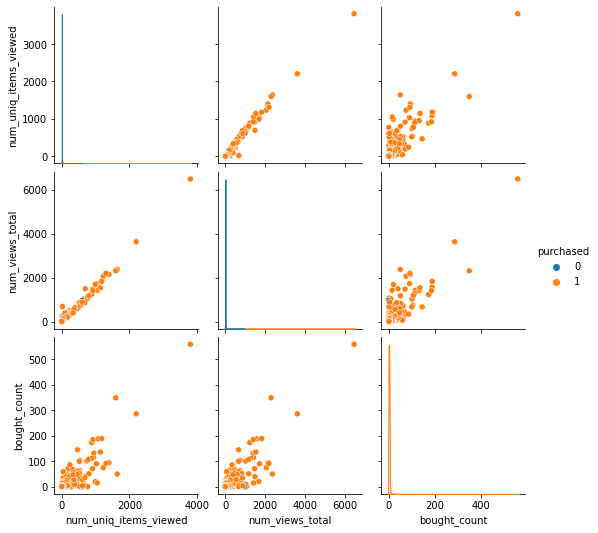

In [ ]:
#Concatenating 2 dataframes along 2 axes
main_df = pd.concat([buy_visitors_df, view_visitors_df], ignore_index=True)

main_df = main_df.sample(frac=1)

#calling a pairplot function
sns.pairplot(main_df, x_vars = ['num_uniq_items_viewed', 'num_views_total', 'bought_count'], y_vars = ['num_uniq_items_viewed', 'num_views_total', 'bought_count'],  hue = 'purchased')

Histograms show the distribution of one value. Top-left histogram represents the frequency of number of unique items viewed. 

From the pairplots above we can see that first of all there is a clear linear regression in when ploting how many unique items were viewed to how many items vere viewed in total. This means that the customer that views a certain item a lot, is also viewing a lot of other items. 
We also can see a strong correlation between the number of unique items viewed and items bought. This means that the more unique items visitors view the more they buy.

Having that in mind now we should look what influences visitors to buy or view items.

## Time Influence

### The goal

Firstly we decided to check if the time has any influence on visitors behaviours.
We need to convert unix timestamp into a understandable format.

### The code

The timestamp attribute was expressed Unix Epoch format, but in the Data Cleaning section we converted it into a readable format.

In [ ]:
#Converting Timestamp in the events dataframe
liste=[]
#using enumerate to count the ammount timestamp appears in the dataframe
for i, unix in enumerate(data_events['timestamp']):
  #converting timestamp into datetime format
    timestamp, ms = divmod(unix, 1000)

    #creating datafarme to hold the date and the time converted from timestamps
    dt = datetime.datetime.fromtimestamp(timestamp) + datetime.timedelta(milliseconds=ms)
    #making a list that will hold the date and time in the described format
    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

    liste.append(formatted_time)
#making another column in the dataframe to hold the dates and times from the list
data_events['date_time']=pd.DataFrame({'date_time':liste})
data_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


Now that we can have understandable reporesentation of time, we will try see is any connection between day of the week and visitor activity.

Here we are formating the converted timestamp so we can use various integratedfunctions. Like taking the day of the week form the date from that converted timestamp

In [ ]:
#making sure the date_time column is datetime format, so we can later use datetime library functions
data_events.date_time=pd.to_datetime(data_events.date_time)
#making a column that will hold the which day of week the date is. 0 is monday 6 is sunday
data_events['dayofweek']=data_events.date_time.dt.dayofweek


In [ ]:
data_events.groupby('dayofweek').count()

,timestamp,visitorid,event,itemid,transactionid,date_time
dayofweek,,,,,,
0,439813,439813,439813,439813,3848,439813
1,447077,447077,447077,447077,3973,447077
2,431114,431114,431114,431114,4151,431114
3,418761,418761,418761,418761,3750,418761
4,379699,379699,379699,379699,2929,379699
5,305215,305215,305215,305215,1811,305215
6,334422,334422,334422,334422,1995,334422


In [ ]:
#creating new rows in the dataframe that will hold hour and day of the week
data_events['hour']=data_events.date_time.dt.hour
data_events['week']=data_events.date_time.dt.isocalendar().week
data_events['date_time']=pd.to_datetime(data_events['date_time'])


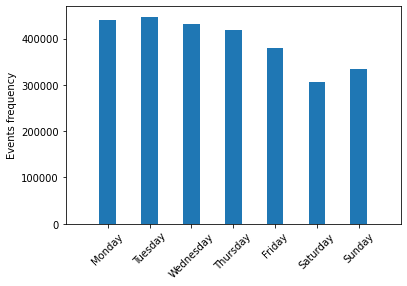

In [ ]:
#arranging bins of the histogram
bins = np.arange(11) - 0.5
#ploting the days of the week frequencies of all events
plt.hist(data_events['dayofweek'], bins, rwidth=0.4)
plt.ylabel('Events frequency')
#days of week are expressed in number originaly (0 is monday, 6 is Sunday), so we give names instead of numbers
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlim([-1, 7])


plt.show()



We can see that visitors are most active from Monday to Thursday. On Friday and Satruday it's relatively quiet, but on Sunday we can see a big jump in activity

Below is a plot of 130m e-commerce sales of 2019. So when comparing the two we can see they are pretty similar, but not enought to conclude that our data follows regular customers behaviour

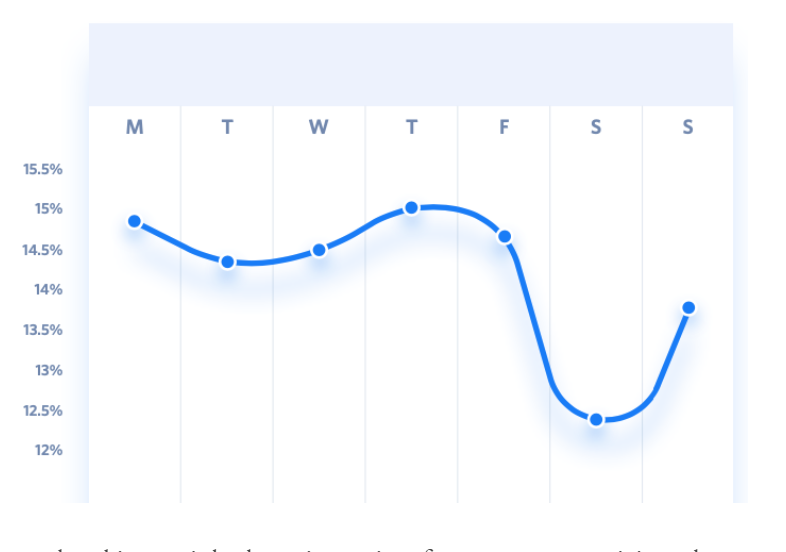

(Charlton, 2021)

Now we will check the hours popularity

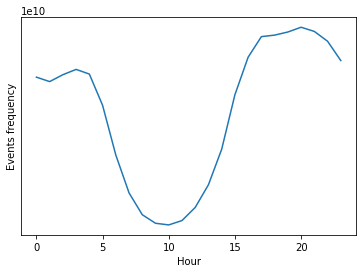

In [ ]:
plt.plot(data_events[['hour','itemid']].groupby('hour').sum())
plt.xlabel('Hour')
plt.ylabel('Events frequency')
plt.tick_params(axis='y', 
                left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.show()

From our data we can see that the popular hours don't really follow regular consumers patterns. From our data we see substantial activity from 00 till 5am, where as below there isn't. Also above we can see a drop in activity from 20pm whereas, below shows a strong increse in activity which peaks at around 22.

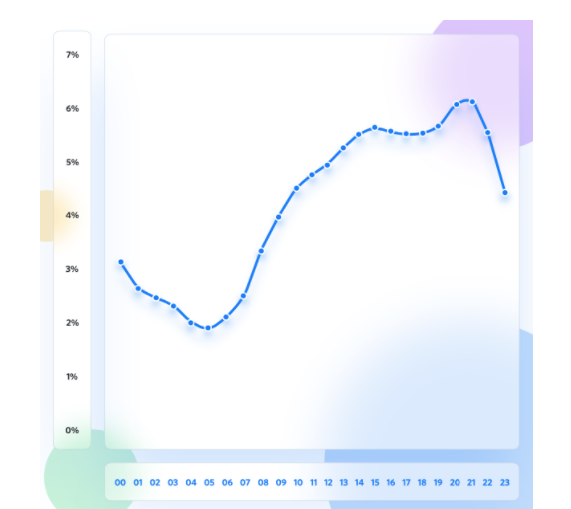

(Charlton, 2021)

The interest in products is cleary highest from 3pm to 8pm, but we can also see that it's quite big from 00 to 5am

It would also be useful to see if there is any correlation between visitors activity and what day of the year it is

In [ ]:
def create_dataframe_time(visitor): #defining a function for data frame creation 
    #array that will hold the new dataframe
    visitor_df_array = []

    for x in visitor:

        
        #Creating dataframe that get the data about visitors accendigly from the timestamp from data_events dataframe 
        t_df =  v_df = data_events[data_events.visitorid == x]
        #Creating a temporary array to hold all the visitors attributes
        temp = []
        #Populating array's first element with the current index
        ##temp.append(x)
        #Populating the array with the number of unique products viewed by the visitor (num_uniq_items_viewed)
        tz = int(data_events.timestamp[x])
        tz= tz // 1000  #remove last 3 digits, which are microseconds

        #new_time = datetime.datetime.fromtimestamp(tz)
        #final=new_time.strftime('%Y-%m-%d')
        
        temp.append(tz)
        temp.append(t_df.visitorid.count())


    #appending the visitor data frame array that holds all the attributes
        visitor_df_array.append(temp)
    #returning dataframe with all the attributes, and naming the collumns of the data frame    
    return pd.DataFrame(visitor_df_array, columns=['timestamp', 'visitors_num'])

In [ ]:
time_df=create_dataframe_time(buy_visitors)

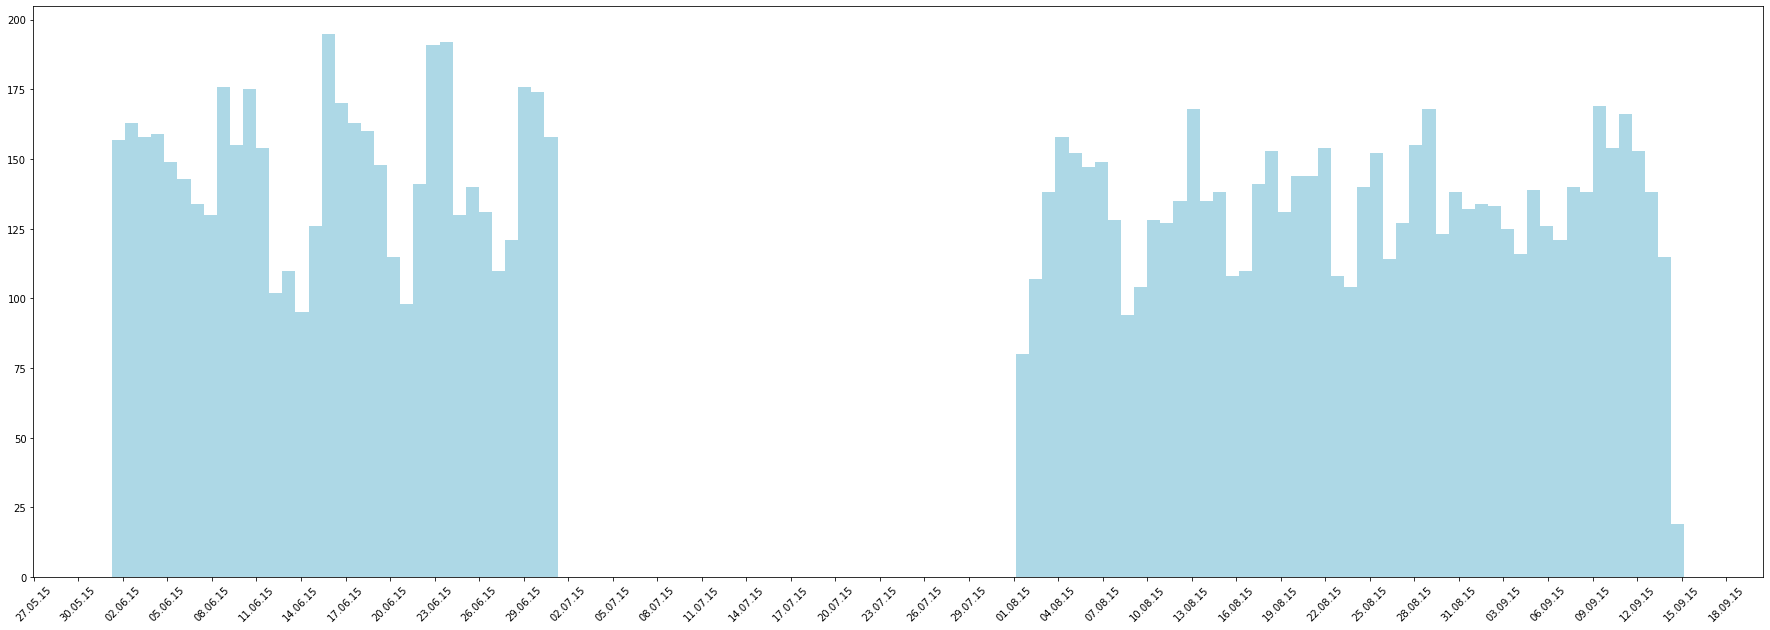

In [ ]:

date = time_df.timestamp

#converting the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(date)


#ploting the dates
fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=120, color='lightblue')


#setting custom parrameters for the plot
fig.set_size_inches(31, 10.5)
#setting the plot to show dates in the interval of 3
locator = mdates.DayLocator(interval=3)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.xticks(rotation=45)


plt.show()



From the graph above we can see that the spikes in sales are repetetive. And if we check which days of weeks the biggest spikes are on, we see that it's Tuesday and Wednesday. This suggests that the purchases aren't influenced by any kind special date events, holidays.

###The outcome

AS previously noted, the hours of activity don't follow regular consumers, the patter of week days isn't very close to regular consumer pattern, and also we don't see peaks, spikes in visitors activity based on holidays, date events. It seems that the main buyers could be businesses or people that need to restock on supplies, but further analysis is needed.

#Customer Segmentation-subtask2. Interaction patterns


## The goal

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. (Shopify, 2020)


We thought it would be a good idea to see how many views does each customer makes. This could help to segment visitors because it would tell whether people mainly like to look at the items, but eventualy not buy anything, or do they know what they want to buy and just go buy it without looking at the items catalog much.

## The code

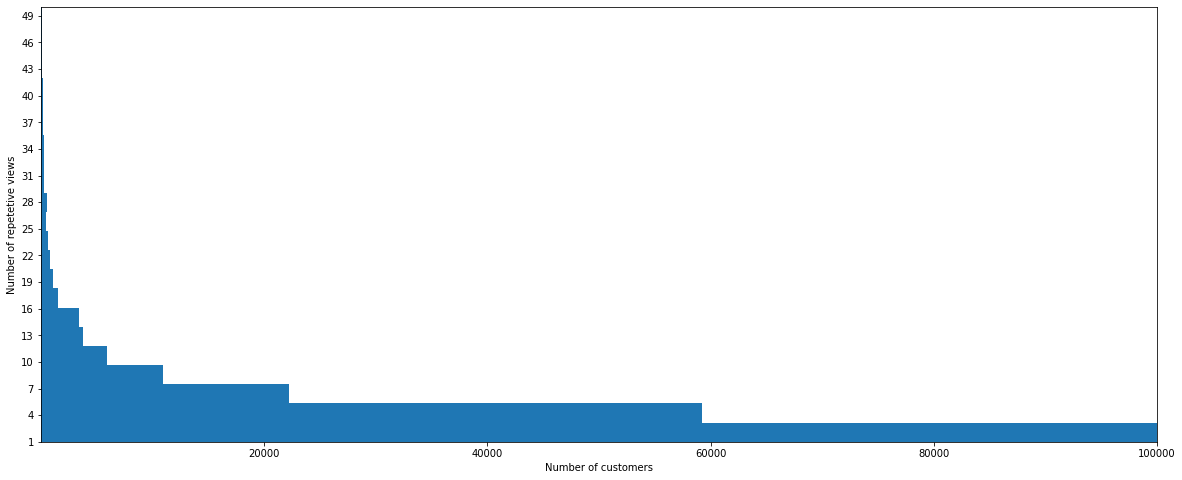

In [ ]:
#Holds the amount of how many times each visitor has viewed the items
x= data_events[data_events.event=="view"].visitorid.value_counts()


plt.figure(1 , figsize = (20 , 8))
plt.ylabel('Number of repetetive views')
plt.xlabel('Number of customers')
plt.hist(x, bins=3000, orientation="horizontal")

#setting limits for each axis so the histogram is easier to read
plt.ylim([1, 50])
plt.xlim([1, 100000])
#customizing the ticks of the axes
plt.yticks(np.arange(1, 50, 3))
plt.show()





We can see that most of the time the visitors view the items only about 5 times. That suggests that there aren't many users that just like to browse  products, rather, it's likely they have made a decision what they will buy before looking at the items catalog. Even though the histogram shows the visitors who have viewed and bought, but also one who didn't buy anything eventualy, we saw previously that the views have very strong correlation to buying decision. Nonentheless we should make sure that average number of views before purchase, is actualy around 5-7.

In [ ]:
# obtain vistor id,item id, and date time of 'tranaction'
item_tra=data_events[['visitorid','itemid','date_time']][data_events['event']=='transaction']
# obtain vistor id,item id, and date time of 'add to cart'
item_atc=data_events[['visitorid','itemid','date_time']][data_events['event']=='addtocart']
# obtain vistor id,item id, and date time of 'view'
item_viw=data_events[['visitorid','itemid','date_time']][data_events['event']=='view']
#CHANGE!!!

In [ ]:
m=item_tra.merge(item_atc, how='inner', on=['visitorid','itemid'], suffixes=[' (transaction)', ' (add_to_cart)'])
m=m.merge(item_viw, how='inner', on=['visitorid','itemid'])
m=m.rename(columns={'date_time':'date_time (view)'})
#CHANGE!!!

In [ ]:
m['date_time (transaction)']=pd.to_datetime(m['date_time (transaction)'])
m['date_time (add_to_cart)']=pd.to_datetime(m['date_time (add_to_cart)'])
m['date_time (view)']=pd.to_datetime(m['date_time (view)'])
#CHANGE!!!

In [ ]:
# the following dataframe is about the cases that a visitor viewed an item before making purchase decision

# find rows with time difference is larger than 0 minute
msk=(m['date_time (transaction)']-m['date_time (view)'])>np.timedelta64(0,'m')
m1=m[msk]
#CHANGE!!!

In [ ]:
# seperate multiple-view transaction and single-view transaction

# using duplicated function
mul_viw=m1.duplicated(subset=['visitorid','itemid'], keep=False)
sig_viw=m1[~mul_viw]
mul_viw=m1[mul_viw]

# last occurrence in duplicates = view when a visitor made purchase
# therefore, filter dataframe to leave only views before last occurence
notlast=mul_viw.duplicated(subset=['visitorid','itemid'], keep='last')  # except for last occurance

# count the number of view
# obtain the average number of it
avg_viw=mul_viw[notlast].groupby(['visitorid','itemid']).count()['date_time (view)'].mean()
print('Average Number of Views Before Purchase: {0:.0f}'.format(avg_viw))
#CHANGE!!!

Average Number of Views Before Purchase: 4


## The outcome


The data shows that there are very little views before making a purchase. There also aren't many users that just like to look at items, products, because the view count of all visitors is around 5-7, rather it's likely they have made a decision what they will buy before looking at the items catalog. Having the previous conclusions in mind, it would be a good guess that one of the customers group, and the biggest group of buyers are people who buy items to restock. 



The graph above shows the accuracy of our binary classifier (Logistic Regression). Just means that the closer the orange curve leans to the top left hand part of the graph, the better the accuracy.


#Recommender systems - subtask3

##Collaborative Filtering (CF)

What is CF?
* Collaborative filtering filters information by using the interactions and data collected by the system from other users. 
* It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future.
* In short, if someone has similar purchasing history to me then I might like another item they have purchased.

(Schafer, et al., 2007)


### Shared items recommender

####The goal

First approach to make a product recommender we thought about is to take the items that 1 customer has bought and recommend items other customers bought with that item

#### The code


Firstly we create a list that holds the customer orders and the items inside them

In [ ]:
# Creating a list that will hold the list of each customers bought items
purchased_items = []
    

for customer in buy_visitors:

   #now we append each item a customer has bought in to the list 
    
    purchased_items.append(list(data_events.loc[(data_events.visitorid == customer) & (data_events.transactionid.notnull())].itemid.values))            

Write a function that would which would give list of items that were bought together with a specified item

In [ ]:
def recommender_bought_bought(item_id, purchased_items):
    
    # Perhaps implement a binary search for that item id in the list of arrays
    # Then put the arrays containing that item id in a new list
    # Then merge all items in that list and get rid of duplicates
    recommender_list = []
    for x in purchased_items:
        if item_id in x:
            recommender_list += x
    
    #Then merge recommender list and remove the item id
    recommender_list = list(set(recommender_list) - set([item_id]))
    
    return recommender_list

If we enter an item id here we will get a list of items that appeared in the orders with the specified item

In [ ]:
recommender_bought_bought(302422, purchased_items)

[105792, 200793, 12836, 80582, 380775, 15335, 400969, 25353, 237753, 317178]

We can also check for similar items to each item of a specificied customer. So if a customer has bought item "2" and item "1" here we will apply the method above and find items that are shared with item "2" and item "1". Here is a list of items that were ordered at least 3 other orders or times together with the items from our chosen customer (customer 172) order

In [ ]:

#here you can enter preffered customer id in place of  "172"
items_bought= list(data_events[data_events.visitorid==172].itemid.unique())



allitems= []
#creating a for loop that runs the lenght of the items_bought list
for x in range(len(items_bought)):
  #and for each of the items calls a function used previously
    allitems += recommender_bought_bought(items_bought[x], purchased_items)



print([itemy for itemy, count in collections.Counter(allitems).items() if count >= 3])



[63543, 231482, 118914, 112782, 37029, 284871, 266439, 186702, 442725, 35202, 268883, 248455, 338660, 213834, 445351, 119736, 56323, 11279, 228392, 17478, 210002, 408737, 29863, 167126, 214271, 384302, 249247, 382419, 450082, 321089, 9877, 355994, 325310, 429765, 85774, 442131, 465522, 234255]


#### The outcome

These items could be recomended to our customer specified customer

##Content-Based

What is Content-Based Filtering?
* Using item meta data, in this case the categoryid we can recommend similar items.
* Ranking the most popular item in each category provides a useful way of aggregating the most highly desired items.
(Meteren & Someren, 2013)

### Category Recommender

#### The Goal

Since we have a dataframe relating items to their categorys, perhaps we could recommend the most popular items in their respective categories.

#### The Code

In [ ]:
#creating an array of customers who have purchased something
customer_purchased = data_events[data_events.transactionid.notnull()].visitorid.unique()
    
purchased_items = []
buyer = []
    
# Create another list that contains all their purchases 
for customer in customer_purchased:

    #Generate a Pandas series type object containing all the visitor's purchases and put them in the list
    buyer.append(customer)
    purchased_items.append(list(data_events.loc[(data_events.visitorid == customer) & (data_events.transactionid.notnull())].itemid.values))
       


In [ ]:
#Creating a purchased items dataframe
purchased_items_df = pd.DataFrame({"Purchased_items":purchased_items})
purchased_items_df.head()

,Purchased_items
0,[356475]
1,"[15335, 380775, 237753, 317178, 12836, 400969,..."
2,[81345]
3,"[150318, 49521]"
4,"[310791, 299044]"


In [ ]:
buyer_df = pd.DataFrame({"Buyer":buyer, "Purchased_items":purchased_items})
buyer_df.head()

,Buyer,Purchased_items
0,599528,[356475]
1,121688,"[15335, 380775, 237753, 317178, 12836, 400969,..."
2,552148,[81345]
3,102019,"[150318, 49521]"
4,189384,"[310791, 299044]"


In [ ]:
#function for getting item_id's based on purchases and categoryid
#NOTE: Some Items appear to not have categoryID's
#Something that could be added here is selected the most popular category from that person or combine with previous section and find most popular category based on other people who have similiar purchases.

def cat_recommender_top3(visitor):

  #get an array of all items bought by a customer
  purchased_item_ID = buyer_df.loc[buyer_df['Buyer'] == visitor, 'Purchased_items'].iloc[0]
  recommended_items = pd.DataFrame()
  popular_recommended = pd.DataFrame()
  #loop through array
  for x in purchased_item_ID:

    #check if the itemid exists in the table
    if x in item_category['itemid'].values:

      #find categoryid for that item
      categoryid = item_category.loc[item_category['itemid'] == x, 'categoryid'].iloc[0]

      #return all items with that categoryid
      i = pd.DataFrame(item_category.loc[item_category['categoryid'] == categoryid, 'itemid'])

      #add to recommended_items
      recommended_items = pd.concat([recommended_items, i])

  #check if dataframe is empty
  if not recommended_items.empty:

    #give the column a name
    recommended_items.columns = ['itemid']
    #reset index
    recommended_items = pd.DataFrame(recommended_items).reset_index()

    #loop through recommended items and find the most frequently sold
    for x in range(len(recommended_items)):
      searchid = recommended_items.loc[x, 'itemid']
      z = pd.DataFrame(transaction.loc[transaction['itemid'] == searchid])
      popular_recommended = pd.concat([popular_recommended, z])

    #order by count in ascending order
    popular_recommended = popular_recommended.sort_values('transaction', ascending = False)

    #drop the count column
    popular_recommended = popular_recommended.drop(['transaction'], axis = 1)

    #top 3
    popular_recommended = popular_recommended.head(3)

    return popular_recommended

  else:

    return "No Items to recommend"




In [ ]:
print(cat_recommender_top3(121688)) #provide visitor ID

    itemid
3   312728
8   420960
15  268883


#### The Outcome

The cat_recommender_top3 recommends the top 3 items within a visitor's favourite category, this could be used in conjuction with the CF recommender to provide some form of hybrid recommendation

##Apriori


### Apriori Algorithm 



What is Aproiri?
Apriori is an algorithm for frequent item set mining and association rule learning over a dataset. It proceeds by identifying the frequent individual items in the dataset and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the dataset. (Agrawal & Srikant, 2001).


### The Goal

Apriori is an algorithm for frequent item set mining and association rule learning. Essentially the hope is that by applying this algorithm to the dataset we will discover links or "rules" which bind items together. This can then be used to recommend items to a user

### The Code

In [ ]:
# Firstly let's create an array that lists visitors who made a purchase
customer_purchased = data_events[data_events.transactionid.notnull()].visitorid.unique()
    
purchased_items = []
    
# Create another list that contains all their purchases 
for customer in customer_purchased:

    #Generate a Pandas series type object containing all the visitor's purchases and put them in the list
    purchased_items.append(list(data_events.loc[(data_events.visitorid == customer) & (data_events.transactionid.notnull())].itemid.values))    

In [ ]:
# Number of unique items in transactions
data_events.loc[data_events.transactionid.notnull(), 'itemid'].unique().size

12025

In [ ]:
#Here we can find the biggest order size. 
max_len=0
for x in purchased_items:
    if len(x) > max_len:
        max_len = len(x)
        
print(f'Biggest purchase size: {max_len} items')

Biggest purchase size: 559 items


Using and TransactionEncoder object, we can transform this dataset into an array format suitable for typical machine learning APIs. Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(purchased_items).transform(purchased_items)
df_pi = pd.DataFrame(te_ary, columns=te.columns_)
df_pi.shape

(11719, 12025)

In [ ]:
df_pi.head()

,15,19,25,42,147,168,199,212,233,304,320,387,403,496,546,563,572,651,655,698,720,821,822,829,835,856,869,909,963,1022,1035,1090,1115,1152,1164,1171,1211,1255,1261,1267,...,465455,465470,465472,465495,465511,465522,465554,465565,465606,465616,465622,465650,465680,465751,465811,465824,465833,465922,465943,465951,465977,466008,466079,466109,466114,466135,466161,466259,466263,466301,466319,466321,466342,466443,466464,466526,466603,466614,466710,466861
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#this returns the support value for each itemset, this is used in creating rules later on
frq_items = apriori(df_pi, min_support=0.001)
frq_items.head()

,support,itemsets
0,0.001707,(14)
1,0.003925,(185)
2,0.001792,(244)
3,0.001451,(264)
4,0.001024,(299)


In [ ]:
#Here we define a dataframe with the rules we've found
rules = association_rules(frq_items, metric="confidence", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(11484),(5436),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214
1,(5436),(11484),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666


### The Outcome
Upon Analysing the ruleset above there is a clear relationship between itemsets 11484 and 5436, this ruleset can be applied to when a user has shown interest in either itemsets

##Hybrid Recommender System

### Lightfm

What is lightfm?
LightFM is a Python implementation of a number of popular recommendation algorithms for both implicit and explicit feedback. (Lightfm, 2021)

Why did we use it?
We chose to use lightfm not only because of its hybrid capabilities but also because of the fact that it allows you to use normal user-item interactions for making predictions for known users. This is crucial as since we had no formal ratings for items, we could still generate recommendations based of these interactions. Since  we only have implicit feedback (Jawaheer, et al., 2010) from the users lightfm’s flexibility in this regard is useful (Lightfm, 2021).  

### The goal

Hybrid recommender systems combine two or more recommendation strategies in different ways to benefit from their complementary advantages. A real world example of a hybrid recommender is netflix (Burke, 2002). By accounting for all events surrounding an item and user we can then accurately predict what items are likely to be purchased by a user and therefore recommend them.



### The code

In [ ]:
# Format the timestamp as a date and arrange it in chronological order.
events = data_events.assign(date=pd.Series(datetime.datetime.fromtimestamp(i/1000).date() for i in data_events.timestamp))
events = events[['visitorid','itemid','event','date']]
events = events.sort_values(by=['date']).reset_index(drop=True)
events.head()


,visitorid,itemid,event,date
0,689859,421640,view,2015-05-03
1,935582,203248,view,2015-05-03
2,696326,194830,view,2015-05-03
3,131668,395045,view,2015-05-03
4,595484,129111,view,2015-05-03


Since the dataset is very large, we're only going to use the data over a 2 week span to reduce the time it takes to compute

In [ ]:
start_date = '2015-5-3'
end_date = '2015-5-18'
fd = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date()
events = events[(events.date >= fd(start_date)) & (events.date <= fd(end_date))]

In [ ]:
# Divide training sets and test sets
split_point = np.int(np.round(events.shape[0]*0.8))
events_train = events.iloc[0:split_point]
events_test = events.iloc[split_point::]
events_test = events_test[(events_test['visitorid'].isin(events_train['visitorid'])) & (events_test['itemid'].isin(events_train['itemid']))]

In [ ]:
id_cols=['visitorid','itemid']
trans_cat_train=dict()
trans_cat_test=dict()

for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    trans_cat_train[k]=cate_enc.fit_transform(events_train[k].values)
    trans_cat_test[k]=cate_enc.transform(events_test[k].values)

In [ ]:
ratings = dict()
#Generating the ratings for each user-item interaction pair
cate_enc=preprocessing.LabelEncoder()
ratings['train'] = cate_enc.fit_transform(events_train.event)
ratings['test'] = cate_enc.transform(events_test.event)

In [ ]:
n_users=len(np.unique(trans_cat_train['visitorid']))
n_items=len(np.unique(trans_cat_train['itemid']))

In [ ]:
#Creating the rating spare matrix using both the test and train ratings 
rate_matrix = dict()
rate_matrix['train'] = coo_matrix((ratings['train'], (trans_cat_train['visitorid'], trans_cat_train['itemid'])), shape=(n_users,n_items))
rate_matrix['test'] = coo_matrix((ratings['test'], (trans_cat_test['visitorid'], trans_cat_test['itemid'])), shape=(n_users,n_items))

In [ ]:
model = LightFM(no_components=5, loss='warp')
model.fit(rate_matrix['train'], epochs=100, num_threads=8)

In [ ]:
#Getting recommendation from the model

df = events[['itemid']]
items = df.to_numpy()
def sample_recommendation(model, data, user_ids):

    #number of users and movies in training data
    n_users, n_items = data.shape

    #generate recommendations for each user we input
    for user_id in user_ids:

        #movies our model predicts they will like
        scores = model.predict(user_id, np.arange(n_items))

        #rank them in order of most liked to least
        top_items = items[np.argsort(-scores)][:3]

        print(top_items)

sample_recommendation(model, rate_matrix['train'], [1])

[[194010]
 [300325]
 [325073]]


### The Outcome
From the function above we can display a number of items which would be desirable to users, this is achieved by giving each user-item interaction pair a score within a rating matrix and then selecting any given user and printing the top 3 scoring items.

#Evaluation - subtask4

##Apriori

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(11484),(5436),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214
1,(5436),(11484),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666


The outcome of the aprori algorithm shows that our data is very sparse, since there are so many items the algorithm doesn't return many results with a support value greater than 0.001. The support value shows the "fraction of transactions that contain an itemset" (Chonyy, 2020). What this means is that the majority of instances there won't be a ruleset applicable to a user and although the confidence for this ruleset is relatively high, it isn’t extremely useful since only a fraction of the items are covered by it.

##Hybrid Recommender

###Evaluating Using AUC

The goal is to evaluate the performance of our hybrid recommendation model created through lightfm. To do so we will be using AUC. AUC stands for "Area under the ROC Curve." AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example (Machine Learning Crash Course, 2021). Essentially AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The  higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

####The code

In [ ]:
auc_train = auc_score(model, rate_matrix['train'], num_threads=8).mean()
auc_test = auc_score(model, rate_matrix['test'], num_threads=8).mean()

print("Train AUC %.3f\n"%auc_train)
print("Test AUC %.3f\n"%auc_test)

Train AUC 0.984

Test AUC 0.816



####The outcome

We can see that both the test and train AUC is quite high (max being 1), meaning that our model is successful establishing the probability of an item being purchased by a given user. Consequently, since our AUC is close to 1.0 it suggests that, by and large, our ranking order is correct.

###Evaluating Using Precision at K

The next step is analyse the precision of the recommendations, this is completed using precision at k, "Precision at k is the proportion of recommended items in the top-k set that are relevant" (Maher Malaeb, 2017). K is a user define number which takes the top values for each user.

####The code

In [ ]:
precision_at_k_train = precision_at_k(model, rate_matrix['train'], k = 3, num_threads=8).mean()
precision_at_k_test = precision_at_k(model, rate_matrix['test'], k = 3, num_threads=8).mean()

In [ ]:
print("Train precision@k %.3f\n"%precision_at_k_train)
print("Test precision@k %.3f\n"%precision_at_k_test)

Train precision@k 0.012

Test precision@k 0.011



####The outcome 

It should be noted at this point since we're calculating the mean of the precision if a user has a negative value as one of the item recommendations scores this could severely lower the average. With this in mind we can see quite a low precision but given the massive number of users and looking at the similiarist in scores between the train and test rating matrices, this could be overlooked. Also, seeing at the AUC is so high the recommendations are likely quite accurate.

#Conclusion

**Outcomes:**
* 	Data exploration - In this phase we found empty parentid’s, that the events would have to be split into different dataframes and that there were Unix timestamps.

*   Pre-processing - Item properties had to be merged, timestamps converted and the previously mentioned creation of separate dataframes was done.
* 	Visualization - Multiple graphs and charts were made to help understand and digest the data.

*   Customer behaviour analysis - The user of charts, mainly the pairplot, was used to analyse customer behaviour. This helped us to understand the behaviour and find patterns.

*   Customer Segmentation - This helped us discover that the user is most likely to have already made the decision on what they are going to buy before even looking at the item catalog.

*   Build a shopping recommender system -	During this phase multiple recommenders were created, each give a different outcome and recommendation which can be very useful for the user.

*   Evaluate the recommender system - We chose the evaluate Apriori using AUC and Precision at K, which came back saying that the recommender system was quite accurate. 

Overall, we met the outcomes we expect to reach, showing multiple ways of doing each of the tasks in a lot of cases. The project went relatively smoothly and there were no major issues. There were problems at points but once we had figured out how to fix the issue then that code or fix would be reusable further down the project. We feel that the code and documentation of the code is good and fits the flow. With each segment being explained before hand and after, some even during. The graphs that have been selected are fit for purpose and well explained. The outcome of each section is clearly defined and explained in detail as well and a great deal of work has been put into the whole project. The communication in the group was good, as a group chat was set up as soon as we knew the members of the group.

#REFERENCES
Li, D., Zhang, B. and Li, C., 2015. A feature-scaling-based $ k $-nearest neighbor algorithm for indoor positioning systems. IEEE Internet of Things Journal, 3(4), pp.590-597.

RetailRocket, 2017. Retailrocket recommender system dataset (v4). [Online] 
Available at: https://www.kaggle.com/retailrocket/ecommerce-dataset
[Accessed 18 04 2021].

Machine Learning Crash Course, 2021. Classification: ROC Curve and AUC. [Online] 
Available at: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20(Area%20under%20the%20ROC,than%20a%20random%20negative%20example.
[Accessed 19 04 2021].


Grinstein, U.M.F.G.G. and Wierse, A., 2002. Information visualization in data mining and knowledge discovery. Morgan Kaufmann.

Tanasa, D. and Trousse, B., 2004. Advanced data preprocessing for intersites web usage mining. IEEE Intelligent Systems, 19(2), pp.59-65.

Geron, A. 2019, Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd edn, O'Reilly, Cambridge.

Chralton, G (2021) When Are People Most Likely to Buy Online? SaleCycle. Available from: https://www.salecycle.com/blog/stats/when-are-people-most-likely-to-buy-online/#:~:text=Mondays%20and%20Thursdays%20are%20the,occurs%20between%208pm%20and%209pm. [Accessed 19 04 2021].

Burke, R., 2002. Hybrid Recommender Systems: Survey and Experiments. User Modeling and User-Adapted Interaction, 12(1), p. 331–370.

Maher Malaeb, 2017. Recall and Precision at k for Recommender Systems. [Online] 
Available at: https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54#:~:text=Precision%20at%20k%20is%20the,are%20relevant%20to%20the%20user.
[Accessed 21 April 2021].

Chonyy, 2020. Apriori: Association Rule Mining In-depth Explanation and Python Implementation. [Online] 
Available at: https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6
[Accessed 04 April 2021].

Shopify, 2020. Customer Segmentation. Encyclopedia. Available from https://www.shopify.com/encyclopedia/customer-segmentation
[Accessed 04 April 2021].

Lightfm, 2021. Welcome to LightFM’s documentation!. [Online] 
Available at: https://making.lyst.com/lightfm/docs/home.html#
[Accessed 20 04 2021].

Jawaheer, G., Szomszor, M. & Kostkova, P., 2010. Comparison of Implicit and Explicit Feedback from an Online Music Recommendation Service, London: CeRC, City University London.

Schafer, J. B., Frankowski, D., Herlocker, J. & Sen, S., 2007. Collaborative Filtering Recommender Systems. The Adaptive Web, 4321(1), pp. 291-324.


Meteren, R. v. & Someren, M. v., 2013. Using Content-Based Filtering for Recommendation. Gerard Brandtstraat, 1054(1), pp. 26-28.

Agrawal, R. & Srikant, R., 2001. Fast Algorithms for Mining Association Rules, San Jose: IBM Almaden Research Center .

